## Random Forest Classifier for Network Intrusion Detection
Author: Tirthesh Jain  
Model Name: Random Forest Classifier  
This Jupyter Notebook contains the implementation of a Random Forest Classifier for Network Intrusion Detection. The code includes data preprocessing, feature engineering, model training, and evaluation on both the training and test datasets.

In [123]:
import numpy as np 
import pandas as pd 
import time
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import zscore

In [124]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
low_memory=False
df1=pd.read_csv("/Users/tirthesh/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/Users/tirthesh/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/Users/tirthesh/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/Users/tirthesh/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/Users/tirthesh/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/Users/tirthesh/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/Users/tirthesh/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/Users/tirthesh/Desktop/dataset/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

In [125]:
nRowsRead = None 
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8
df.shape

(2830743, 79)

In [126]:
df[' Label'].value_counts()


BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [127]:
# List of web attack labels
web_attack_labels = ['Web Attack � Brute Force', 'Web Attack � XSS', 'Web Attack � Sql Injection']

# Update 'Label' for rows with web attack labels
df.loc[df[' Label'].isin(web_attack_labels), ' Label'] = 'Web Attack'
df[' Label'].value_counts()

BENIGN              2273097
DoS Hulk             231073
PortScan             158930
DDoS                 128027
DoS GoldenEye         10293
FTP-Patator            7938
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Web Attack             2180
Bot                    1966
Infiltration             36
Heartbleed               11
Name:  Label, dtype: int64

In [128]:
# Filter out groups with less than 100 entries
df = df.groupby(' Label').filter(lambda x: len(x) > 100)

# Print the updated value counts
print(df[' Label'].value_counts())


BENIGN              2273097
DoS Hulk             231073
PortScan             158930
DDoS                 128027
DoS GoldenEye         10293
FTP-Patator            7938
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Web Attack             2180
Bot                    1966
Name:  Label, dtype: int64


In [129]:
df.duplicated().sum()

308381

In [130]:
df.shape


(2830696, 79)

In [131]:
df =  df.drop_duplicates(keep="first")

In [132]:
df.duplicated().sum()

0

In [133]:
df.shape


(2522315, 79)

In [134]:
df.isnull().sum().sort_values(ascending = False)

Flow Bytes/s                    353
 Destination Port                 0
 Bwd Avg Bytes/Bulk               0
 Fwd Avg Packets/Bulk             0
Fwd Avg Bytes/Bulk                0
 Fwd Header Length.1              0
 Avg Bwd Segment Size             0
 Avg Fwd Segment Size             0
 Average Packet Size              0
 Down/Up Ratio                    0
 ECE Flag Count                   0
 CWE Flag Count                   0
 URG Flag Count                   0
 ACK Flag Count                   0
 PSH Flag Count                   0
 RST Flag Count                   0
 SYN Flag Count                   0
FIN Flag Count                    0
 Packet Length Variance           0
 Fwd Avg Bulk Rate                0
 Bwd Avg Packets/Bulk             0
 Packet Length Mean               0
Active Mean                       0
 Idle Min                         0
 Idle Max                         0
 Idle Std                         0
Idle Mean                         0
 Active Min                 

In [135]:
df.dropna(inplace=True)

In [136]:
df.shape


(2521962, 79)

In [137]:
df.isnull().sum().sort_values(ascending = False)

 Destination Port               0
 ECE Flag Count                 0
 Fwd Avg Packets/Bulk           0
Fwd Avg Bytes/Bulk              0
 Fwd Header Length.1            0
 Avg Bwd Segment Size           0
 Avg Fwd Segment Size           0
 Average Packet Size            0
 Down/Up Ratio                  0
 CWE Flag Count                 0
 Bwd Avg Bytes/Bulk             0
 URG Flag Count                 0
 ACK Flag Count                 0
 PSH Flag Count                 0
 RST Flag Count                 0
 SYN Flag Count                 0
FIN Flag Count                  0
 Packet Length Variance         0
 Fwd Avg Bulk Rate              0
 Bwd Avg Packets/Bulk           0
 Packet Length Mean             0
Active Mean                     0
 Idle Min                       0
 Idle Max                       0
 Idle Std                       0
Idle Mean                       0
 Active Min                     0
 Active Max                     0
 Active Std                     0
 min_seg_size_

In [138]:
df.shape


(2521962, 79)

In [139]:
#Memory Optimization and Consistent Data Types
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [140]:
df.shape


(2521962, 79)

In [141]:
#returns only those rows where no element is NaN, positive infinity, or negative infinity. 
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [142]:
df.shape

(2520751, 79)

In [143]:
def correlation(dataset, threshold):
    col_corr = set()  
    #corr() function computes the pairwise correlation coefficients between all numerical columns in the dataset, 
    #resulting in a symmetric matrix.
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
              colname = corr_matrix.columns[i]                  
              col_corr.add(colname)
    return col_corr

In [144]:
corr_features = correlation(df, 0.85)
corr_features

{' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd IAT Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd IAT Std',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets'}

In [145]:
df.drop(corr_features,axis=1,inplace=True)

In [146]:
x = df.drop([' Label'],axis=1)
y = df[' Label']

In [147]:
x.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Bwd Packets/s,Min Packet Length,FIN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Idle Std
0,54865,3,2,12,6,6,0,0,4.000000e+06,666666.687500,3.0,0.0,3,0,0.0,0.0,0,0,0,0,0,40,0,0.000000,6,0,0,0,1,0,0,0,0,0,0,0,0,33,-1,0.0,0.0,0,0.0
1,55054,109,1,6,6,6,6,6,1.100917e+05,18348.623047,109.0,0.0,109,0,0.0,0.0,0,0,0,0,0,20,20,9174.311523,6,0,0,0,1,1,1,0,0,0,0,0,0,29,256,0.0,0.0,0,0.0
2,55055,52,1,6,6,6,6,6,2.307692e+05,38461.539062,52.0,0.0,52,0,0.0,0.0,0,0,0,0,0,20,20,19230.769531,6,0,0,0,1,1,1,0,0,0,0,0,0,29,256,0.0,0.0,0,0.0
3,46236,34,1,6,6,6,6,6,3.529412e+05,58823.531250,34.0,0.0,34,0,0.0,0.0,0,0,0,0,0,20,20,29411.765625,6,0,0,0,1,1,1,0,0,0,0,0,0,31,329,0.0,0.0,0,0.0
4,54863,3,2,12,6,6,0,0,4.000000e+06,666666.687500,3.0,0.0,3,0,0.0,0.0,0,0,0,0,0,40,0,0.000000,6,0,0,0,1,0,0,0,0,0,0,0,0,32,-1,0.0,0.0,0,0.0


In [148]:
y.head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name:  Label, dtype: object

In [149]:
rus = RandomUnderSampler(random_state=0)
rus.fit(x, y)
Xn, yn = rus.fit_resample(x, y)

In [150]:
Xn.head()
Xn.shape

(21428, 43)

In [151]:
# Standardize each column in Xn using z-scores
cols = list(Xn.columns)
for col in cols:
    Xn[col] = stats.zscore(Xn[col])

In [152]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(Xn,yn,test_size=0.30,random_state=0)

In [153]:
#checks if there is any NaN
print(np.any(np.isnan(X_train)))

#checks if all values are finite
print(np.all(np.isfinite(X_train)))

True
False


In [154]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with 'mean' strategy to replace NaN values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to X_train and transform X_train and X_test with it
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Apply StandardScaler to X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Define the parameter grid
param_grid = {
    'max_depth': [20, 30, 40, 50],
    'n_estimators': [20, 40, 80, 100]
}

# Create grid search object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

start = time.time()

# Fit the grid search object
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_parameters = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print("Best parameters:", best_parameters)
print("Best score:", best_score)
print("Time taken to train model: ", time.time()-start," seconds")


Best parameters: {'max_depth': 20, 'n_estimators': 100}
Best score: 0.9939996443258863
Time taken to train model:  94.37813758850098  seconds


In [156]:
from sklearn import metrics

# Make predictions on the training set
Predict_X_train = Random_Forest.predict(X_train)

# Evaluate on the training set
accuracy_train = metrics.accuracy_score(Y_train, Predict_X_train)
confusion_matrix_train = metrics.confusion_matrix(Y_train, Predict_X_train)
classification_train = metrics.classification_report(Y_train, Predict_X_train)

# Print or store the evaluation metrics on the training set
print("Training Accuracy:", accuracy_train)
print("Training Confusion Matrix:\n", confusion_matrix_train)
print("Training Classification Report:\n", classification_train)

# Perform cross-validation on the training set
cross_val_scores_train = cross_val_score(Random_Forest, X_train, Y_train, cv=5)

# Print or store the cross-validation scores on the training set
print("Cross-Validation Scores on Training Set:", cross_val_scores_train)


Training Accuracy: 0.9995999733315555
Training Confusion Matrix:
 [[1372    0    0    0    0    0    0    0    0    0    6]
 [   0 1372    0    0    0    0    0    0    0    0    0]
 [   0    0 1386    0    0    0    0    0    0    0    0]
 [   0    0    0 1350    0    0    0    0    0    0    0]
 [   0    0    0    0 1345    0    0    0    0    0    0]
 [   0    0    0    0    0 1379    0    0    0    0    0]
 [   0    0    0    0    0    0 1347    0    0    0    0]
 [   0    0    0    0    0    0    0 1365    0    0    0]
 [   0    0    0    0    0    0    0    0 1377    0    0]
 [   0    0    0    0    0    0    0    0    0 1311    0]
 [   0    0    0    0    0    0    0    0    0    0 1389]]
Training Classification Report:
                   precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00      1378
             Bot       1.00      1.00      1.00      1372
            DDoS       1.00      1.00      1.00      1386
   DoS GoldenEye       1.00  

In [157]:
# Make predictions on the test set
Predict_X_test = Random_Forest.predict(X_test)

# Evaluate on the test set
accuracy_test = metrics.accuracy_score(Y_test, Predict_X_test)
confusion_matrix_test = metrics.confusion_matrix(Y_test, Predict_X_test)
classification_test = metrics.classification_report(Y_test, Predict_X_test)


In [158]:
print()
print('--------------------------- Results --------------------------------')
print()

# Print the evaluation metrics on the test set
print("Test Accuracy:", accuracy_test)
print()
print("Test Confusion Matrix:\n", confusion_matrix_test)
print()
print("Test Classification Report:\n", classification_test)
print()


--------------------------- Results --------------------------------

Test Accuracy: 0.9954891896095815

Test Confusion Matrix:
 [[561   3   0   2   3   0   0   0   1   0   0]
 [  1 575   0   0   0   0   0   0   0   0   0]
 [  0   0 562   0   0   0   0   0   0   0   0]
 [  1   0   0 597   0   0   0   0   0   0   0]
 [  0   0   0   1 600   0   0   0   2   0   0]
 [  2   0   0   2   0 563   2   0   0   0   0]
 [  2   0   0   1   0   1 597   0   0   0   0]
 [  0   0   0   0   0   0   0 583   0   0   0]
 [  0   0   0   0   0   0   0   0 571   0   0]
 [  0   0   0   0   0   0   0   0   0 637   0]
 [  4   0   0   1   0   0   0   0   0   0 554]]

Test Classification Report:
                   precision    recall  f1-score   support

          BENIGN       0.98      0.98      0.98       570
             Bot       0.99      1.00      1.00       576
            DDoS       1.00      1.00      1.00       562
   DoS GoldenEye       0.99      1.00      0.99       598
        DoS Hulk       1.00    

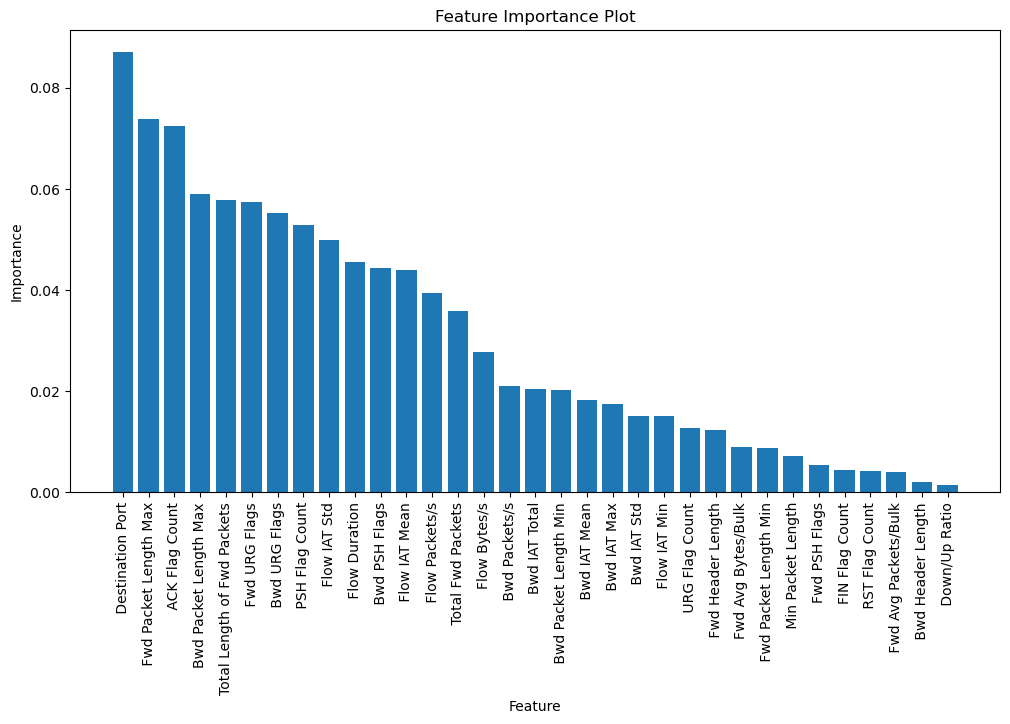

In [164]:
import matplotlib.pyplot as plt
# Get feature importances
feature_importances = Random_Forest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(indices)), feature_importances[indices], align='center')
plt.xticks(range(len(indices)), df.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()
